In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 2D Plots

In [5]:
def calculate_post(prior:float = 0.01, sensitivity:float = 0.95, specificity:float = 0.9):
    # calculate probability of a positive result
    p_pos = (prior * sensitivity) + ((1-prior) * (1-specificity))

    # calculate the probability that one has the disease given a positive result
    return (sensitivity * prior) / (p_pos)

In [6]:
def visualize_prior_post(points:int = 1000, prior:float = 0.01, sensitivity:float = 0.95, specificity:float = 0.9):
    # initialize arrays
    values = np.zeros(points)
    x_axis = np.zeros(points)

    # for each point, calculate the posterior probability
    for i in range(points):
        x_val = float(i)/float(points)

        # if probability is the unknown one, use the current point (x value)
        pr = prior if prior != -1 else x_val
        se = sensitivity if sensitivity != -1 else x_val
        sp = specificity if specificity != -1 else x_val

        # set value for given x value
        values[i] = (calculate_post(prior=pr, sensitivity=se, specificity=sp))
        x_axis[i] = x_val

    # return the two axes
    return (x_axis, values)


Text(0, 0.5, 'Posterior')

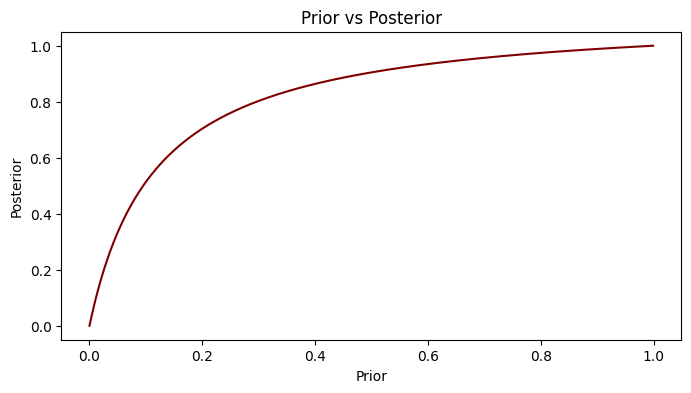

In [7]:
# plotting a variable prior
f, ax = plt.subplots(1, 1, figsize=(8, 4))
varied_prior = visualize_prior_post(points=1000, prior=-1, sensitivity=0.95, specificity=0.9)
ax.plot(varied_prior[0], varied_prior[1], color='maroon')

# labeling
ax.set_title("Prior vs Posterior")
ax.set_xlabel("Prior")
ax.set_ylabel("Posterior")

Text(0, 0.5, 'Posterior')

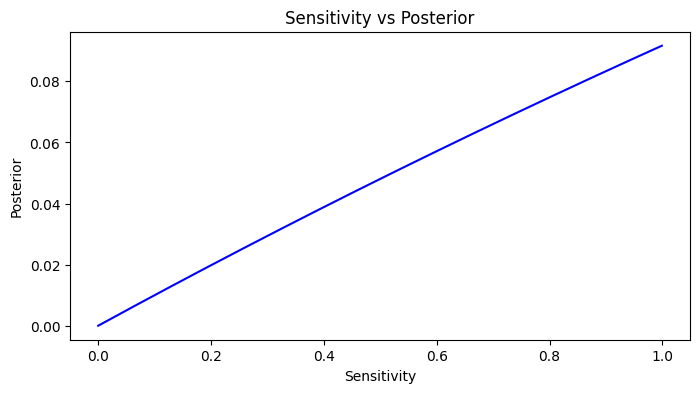

In [8]:
# plotting a variable sensitivity
f, ax = plt.subplots(1, 1, figsize=(8, 4))
varied_sensitivity = visualize_prior_post(points=1000, prior=0.01, sensitivity=-1, specificity=0.9)
ax.plot(varied_sensitivity[0], varied_sensitivity[1], color='blue')

# labeling
ax.set_title("Sensitivity vs Posterior")
ax.set_xlabel("Sensitivity")
ax.set_ylabel("Posterior")

Text(0, 0.5, 'Posterior')

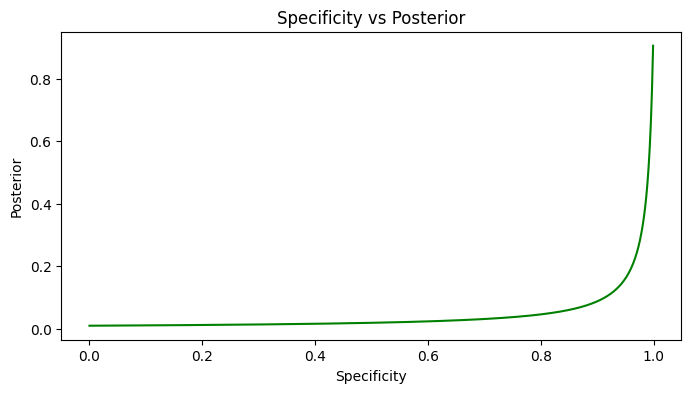

In [9]:
# plotting a variable specificity
f, ax = plt.subplots(1, 1, figsize=(8, 4))
varied_specificity = visualize_prior_post(points=1000, prior=0.01, sensitivity=0.95, specificity=-1)
ax.plot(varied_specificity[0], varied_specificity[1], color='green')
ax.set_title("Specificity vs Posterior")

# labeling
ax.set_xlabel("Specificity")
ax.set_ylabel("Posterior")

Text(0, 0.5, 'Posterior')

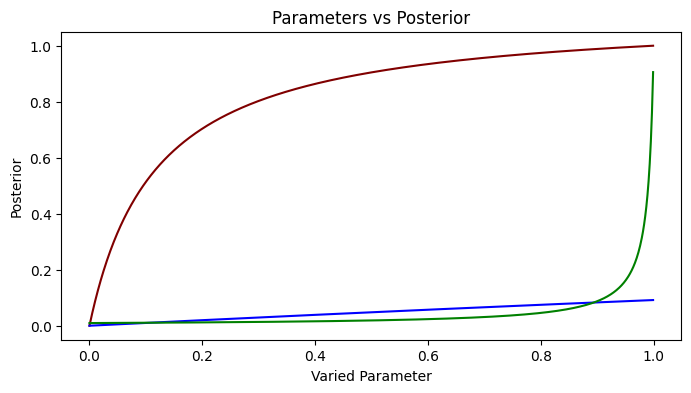

In [10]:
# all three on one graph
f, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(varied_prior[0], varied_prior[1], color='maroon')
ax.plot(varied_sensitivity[0], varied_sensitivity[1], color='blue')
ax.plot(varied_specificity[0], varied_specificity[1], color='green')

# labeling
ax.set_title("Parameters vs Posterior")
ax.set_xlabel("Varied Parameter")
ax.set_ylabel("Posterior")

## 3D Graphs

In [12]:
def visualize_prior_post_3D(points:int = 1000, prior:float = 0.01, sensitivity:float = 0.95, specificity:float = 0.9):
    # initialize arrays
    values = np.zeros(points*points)
    x_axis = np.zeros(points*points)
    y_axis = np.zeros(points*points)
    
    # for each point, generate the variable response
    for i in range(points):
        x_val = float(i)/float(points)

        # either prior is one of the unknowns or its the other two
        # select an unknown to be the current 
        if prior == -1:
            cur_prior = x_val
            cur_sensitivity = sensitivity
        else:
            cur_prior = prior
            cur_sensitivity = x_val

        # calculate variable response of "their" unknown for the current value of "our" unknown
        result = visualize_prior_post(points=points, prior=cur_prior, sensitivity=cur_sensitivity, specificity=specificity)[1]

        # update values
        for j in range(points):
            values[(i*points) + j] = result[j]
            x_axis[(i*points) + j] = i
            y_axis[(i*points) + j] = j
    
    # return x_axis (will double as a second axis) and values
    return (x_axis, y_axis, values)

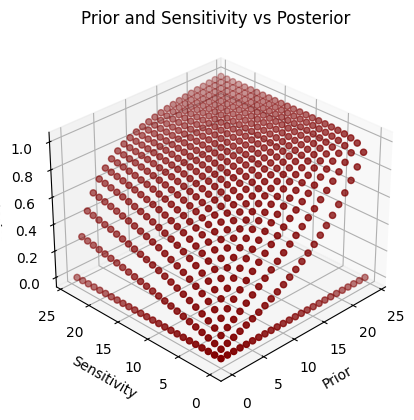

In [13]:
# variable prior and sensitivity
f = plt.figure()
ax = f.add_subplot(projection='3d')
varied_pr_se = visualize_prior_post_3D(points=25, prior=-1, sensitivity=-1, specificity=0.9)
ax.scatter(varied_pr_se[0], varied_pr_se[1], varied_pr_se[2], color='maroon')

# labeling
ax.set_title("Prior and Sensitivity vs Posterior")
ax.set_xlabel("Prior")
ax.set_ylabel("Sensitivity")
ax.set_zlabel("Posterior")

# set angle
ax.view_init(30, -135, 0)


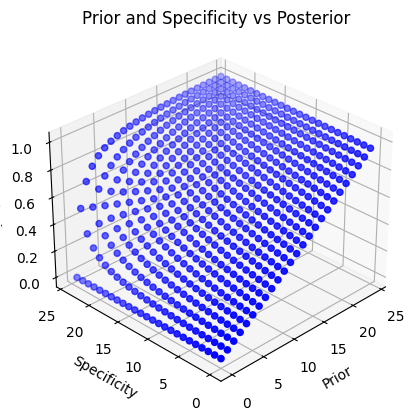

In [14]:
# varied prior and specificity
f = plt.figure()
ax = f.add_subplot(projection='3d')
varied_pr_sp = visualize_prior_post_3D(points=25, prior=-1, sensitivity=0.95, specificity=-1)
ax.scatter(varied_pr_sp[0], varied_pr_sp[1], varied_pr_sp[2], color='blue')

# labeling
ax.set_title("Prior and Specificity vs Posterior")
ax.set_xlabel("Prior")
ax.set_ylabel("Specificity")
ax.set_zlabel("Posterior")

# set angle
ax.view_init(30, -135, 0)

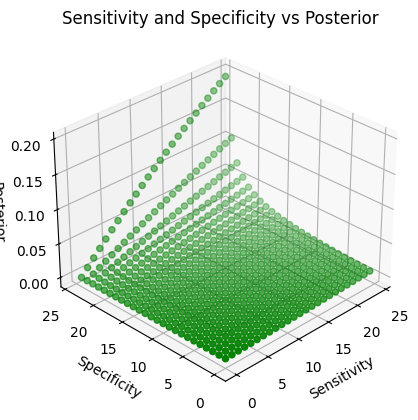

In [15]:
# varied sensitivity and specificity
f = plt.figure()
ax = f.add_subplot(projection='3d')
varied_se_sp = visualize_prior_post_3D(points=25, prior=0.01, sensitivity=-1, specificity=-1)
ax.scatter(varied_se_sp[0], varied_se_sp[1], varied_se_sp[2], color='green')

# labeling
ax.set_title("Sensitivity and Specificity vs Posterior")
ax.set_xlabel("Sensitivity")
ax.set_ylabel("Specificity")
ax.set_zlabel("Posterior")

# set angle
ax.view_init(30, -135, 0)

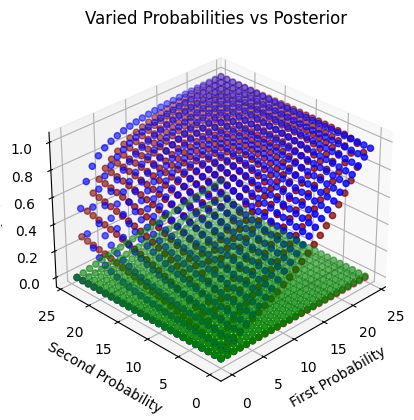

In [16]:
# all three
f = plt.figure()
ax = f.add_subplot(projection='3d')
ax.scatter(varied_pr_se[0], varied_pr_se[1], varied_pr_se[2], color='maroon')
ax.scatter(varied_pr_sp[0], varied_pr_sp[1], varied_pr_sp[2], color='blue')
ax.scatter(varied_se_sp[0], varied_se_sp[1], varied_se_sp[2], color='green')

# labeling
ax.set_title("Varied Probabilities vs Posterior")
ax.set_xlabel("First Probability")
ax.set_ylabel("Second Probability")
ax.set_zlabel("Posterior")

# set angle
ax.view_init(30, -135, 0)